In [3]:
import pandas as pd 
import numpy as np
from random import randint

data = pd.read_csv("diabetes-dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
print(f"Shape: {data.shape}")
print("---------------------------")
print(data.Outcome.value_counts())
print("---------------------------")
print("Check for missing values")
print(data.isna().sum())

Shape: (2000, 9)
---------------------------
0    1316
1     684
Name: Outcome, dtype: int64
---------------------------
Check for missing values
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
colArray = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
print("Number of 0's in each column")
print(data[colArray].isin({0}).sum())

Number of 0's in each column
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
Age                0
dtype: int64


In [6]:
# Convert 0's to mean values +- 10
for col in colArray:
    data[col] = data[col].replace({ 0 : (round(np.mean(data[col])) + randint(-10, 10))})

colArray = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
print("Number of 0's in each column")
print(data[colArray].isin({0}).sum())

Number of 0's in each column
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
dtype: int64


In [24]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# Get features, target and train / test datasets
features = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                 "BMI", "DiabetesPedigreeFunction", "Age"]]
target = data["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=7)

print(f"Length of train set: {len(y_train)}")
print(f"Number of 1's: {sum(y_train)}, Number of 0's: {len(y_train) - sum(y_train)}")

modelG = GaussianNB()
# Train the model
modelG.fit(x_train, y_train)
# Predict values
y_predG = modelG.predict(x_test)
# print(len(list(filter(lambda x: x == 0, y_test.tolist()))))
# print(len(list(filter(lambda x: x == 1, y_predG))))
bayes_acc = metrics.accuracy_score(y_test, y_predG)
bayes_mistakes = metrics.confusion_matrix(y_test, y_predG)[0][1]

print("---------------------------")
print("Naive Bayes")
print("Accuracy: ", bayes_acc)
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_predG))
print(f"Number of serious mistakes (True value is 1, predicted is 0): {bayes_mistakes}")

Length of train set: 1600
Number of 1's: 557, Number of 0's: 1043
---------------------------
Naive Bayes
Accuracy:  0.79
Confusion matrix: 
 [[229  44]
 [ 40  87]]
Number of serious mistakes (True value is 1, predicted is 0): 44


In [25]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN1 = KNeighborsClassifier(n_neighbors=1)
# Train the model using train datasets
modelKNN1.fit(x_train, y_train)
# Predict values
y_predKNN1 = modelKNN1.predict(x_test)
knn1_acc = metrics.accuracy_score(y_test, y_predKNN1)
knn1_mistakes = metrics.confusion_matrix(y_test, y_predKNN1)[0][1]

print("1 Nearest Neighbor")
print("Accuracy: ", knn1_acc)
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_predKNN1))
print(f"Number of serious mistakes (True value is 1, predicted is 0): {knn1_mistakes}")

1 Nearest Neighbor
Accuracy:  0.9775
Confusion matrix: 
 [[267   6]
 [  3 124]]
Number of serious mistakes (True value is 1, predicted is 0): 6


In [26]:
modelKNN3 = KNeighborsClassifier(n_neighbors=3)
# Train the model using train datasets
modelKNN3.fit(x_train, y_train)
# Predict values
y_predKNN3 = modelKNN3.predict(x_test)
knn3_acc = metrics.accuracy_score(y_test, y_predKNN3)
knn3_mistakes = metrics.confusion_matrix(y_test, y_predKNN3)[0][1]

print("3 Nearest Neighbors")
print("Accuracy: ", knn3_acc)
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_predKNN3))
print(f"Number of serious mistakes (True value is 1, predicted is 0): {knn3_mistakes}")

3 Nearest Neighbors
Accuracy:  0.8625
Confusion matrix: 
 [[244  29]
 [ 26 101]]
Number of serious mistakes (True value is 1, predicted is 0): 29


Decision Tree
Accuracy:  0.9825
Confusion matrix: 
 [[271   2]
 [  5 122]]
Number of serious mistakes (True value is 1, predicted is 0): 2


Text tree
|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- BMI <= 31.40
|   |   |   |   |   |--- Insulin <= 48.50
|   |   |   |   |   |   |--- Insulin <= 47.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Insulin >  47.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Insulin >  48.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  31.40
|   |   |   |   |   |--- BMI <= 33.65
|   |   |   |   |   |   |--- Glucose <= 111.00
|   |   |   |   |   |   |   |--- SkinThickness <= 33.50
|   |   |   |   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |   |   |   |--- BloodPressure <= 67.00
|   |   |   |   |   

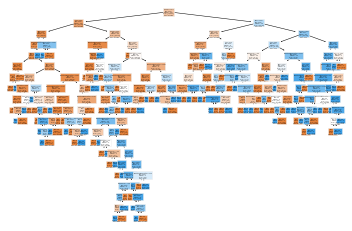

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
import matplotlib.pyplot as plt

feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                 "BMI", "DiabetesPedigreeFunction", "Age"]
target_names = ["Outcome", "hehe"]

modelTree = DecisionTreeClassifier()
modelTree.fit(x_train, y_train)
modelTreePred = modelTree.predict(x_test)
tree_acc = metrics.accuracy_score(y_test, modelTreePred)
tree_mistakes = metrics.confusion_matrix(y_test, modelTreePred)[0][1]

print("Decision Tree")
print("Accuracy: ", tree_acc)
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, modelTreePred))
print(f"Number of serious mistakes (True value is 1, predicted is 0): {tree_mistakes}")
print("\n")
text_tree = export_text(modelTree, feature_names = feature_names)
print("Text tree")
print(text_tree)

print("Tree visualization")
# fig = plt.figure(figsize=(25, 20))
# tree = plot_tree(modelTree, feature_names=feature_names, class_names=target_names, filled=True)
# plt.show()
plot_tree(modelTree, feature_names=feature_names, class_names=target_names, filled=True)
plt.savefig("tree2.png")

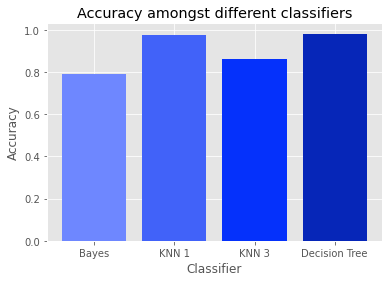

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ["Bayes", "KNN 1", "KNN 3", "Decision Tree"]
accuracy = [bayes_acc, knn1_acc, knn3_acc, tree_acc]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, accuracy, color=["#6E87FF", "#4162F9", "#0531FB", "#0626B8"])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy amongst different classifiers")
plt.xticks(x_pos, x)
plt.show()

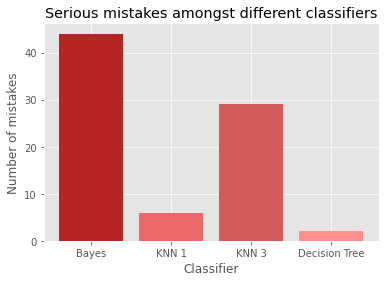

In [38]:
plt.style.use('ggplot')
x = ["Bayes", "KNN 1", "KNN 3", "Decision Tree"]
mistakes = [bayes_mistakes, knn1_mistakes, knn3_mistakes, tree_mistakes]

x_pos2 = [i for i, _ in enumerate(x)]

plt.bar(x_pos2, mistakes, color=["#B72424", "#EA6868", "#D35A5A", "#FF8E8E"])
plt.xlabel("Classifier")
plt.ylabel("Number of mistakes")
plt.title("Serious mistakes amongst different classifiers")
plt.xticks(x_pos, x)
plt.show()